<a href="https://colab.research.google.com/github/robinsonm2021/Data_science/blob/main/Matthew_Robinson_Stats_22_Lab_6_Linear_Fit_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://setosa.io/ev/ordinary-least-squares-regression/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request

In [ ]:
url="https://raw.githubusercontent.com/robinsonm2021/Data_science/main/cereal_data.csv" #The url for the data

In [ ]:
urllib.request.urlretrieve(url, 'cereal_data.csv') #used to retrieve data from the url

('cereal_data.csv', <http.client.HTTPMessage at 0x7f804853d450>)

In [ ]:
cereal_data=pd.read_csv('cereal_data.csv') #this makes the url and data readable

In [ ]:
cereal_data #the data for the set

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [ ]:
cereal_data["sugars"] #the sugars catagory

0      6
1      8
2      5
3      0
4      8
      ..
72     3
73    12
74     3
75     3
76     8
Name: sugars, Length: 77, dtype: int64

In [ ]:
cereal_data[["sodium","calories"]] #used to find specific data points

,sodium,calories
0,130,70
1,15,120
2,260,70
3,140,50
4,200,110
...,...,...
72,250,110
73,140,110
74,230,100
75,200,100


In [ ]:
cereal_data["sugars"].mean()

6.922077922077922

In [ ]:
cereal_data[["sodium","calories"]].#mean data

<bound method NDFrame._add_numeric_operations.<locals>.mean of     sodium  calories
0      130        70
1       15       120
2      260        70
3      140        50
4      200       110
..     ...       ...
72     250       110
73     140       110
74     230       100
75     200       100
76     200       110

[77 rows x 2 columns]>

In [ ]:
cereal_data.describe() #the data put in numbers

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


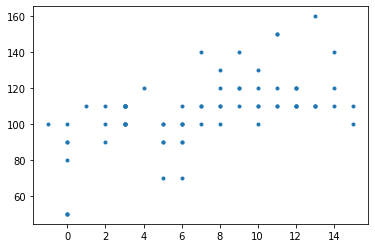

In [ ]:
plt.plot(cereal_data[["sugars"]], cereal_data[["calories"]],'.') #the data points plotted

Text(0.5, 1.0, 'sugars vs calories')

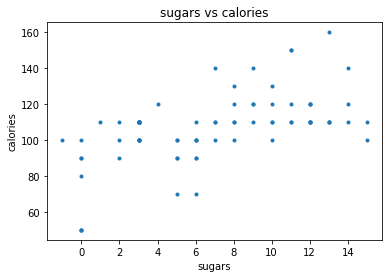

In [ ]:
x=cereal_data[["sugars"]]
y=cereal_data[["calories"]]
plt.plot(x,y,'.')
plt.xlabel("sugars")
plt.ylabel("calories")
plt.title("sugars vs calories")

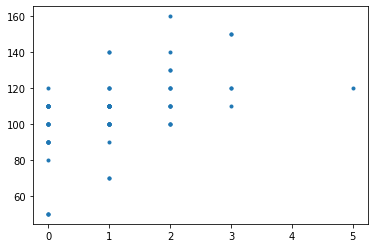

In [ ]:
plt.plot(cereal_data[["fat"]],cereal_data[["calories"]],'.')

Text(0.5, 1.0, 'fat vs sodium')

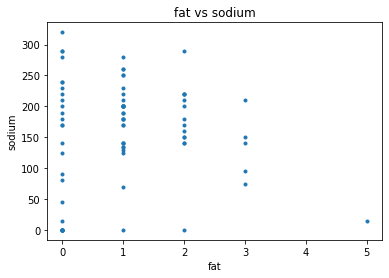

In [ ]:
x=cereal_data[["fat"]]
y=cereal_data[["sodium"]]
plt.plot(x,y,'.')
plt.xlabel("fat")
plt.ylabel("sodium")
plt.title("fat vs sodium")

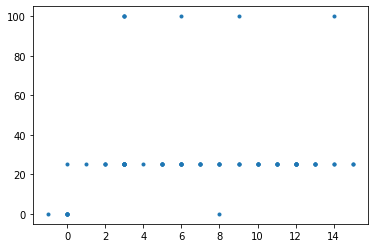

In [ ]:
plt.plot(cereal_data[["sugars"]],cereal_data[["vitamins"]],'.')

In [ ]:
X = cereal_data[["sugars"]]
Y = cereal_data[["rating"]]

In [ ]:
from sklearn.linear_model import LinearRegression #linear regression plot
linear_regressor = LinearRegression() 

In [ ]:
linear_regressor.fit(X, Y) #this is needed to plot with a linear fit
Y_pred = linear_regressor.predict(X)

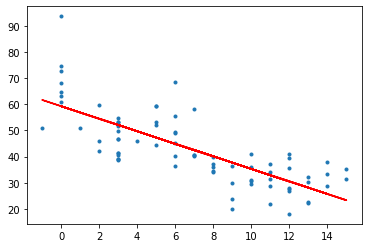

In [ ]:
plt.plot(X, Y,'.') #the plot with linear fit
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
x=np.linspace(0,10,50) #the line spacing for the graph

In [ ]:
x #the array of the x points

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [ ]:
m=3 #slope
b=7
y=m*x+b

In [ ]:
noise=10*np.random.randn(50,) #noise

In [ ]:
y=m*x+b+noise #slope with noise

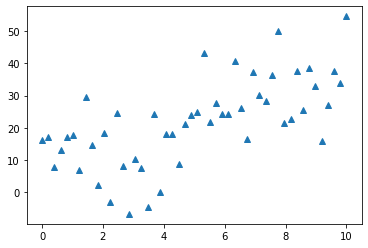

In [ ]:
plt.plot(x,y,'^')

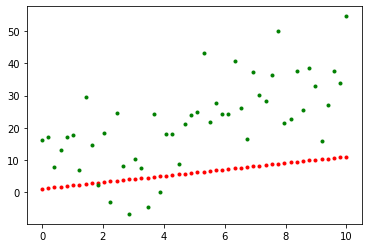

In [ ]:
m_guess = 1 #guess for m and b with line of best fit
b_guess = 1

y_guess = m_guess * x + b_guess

plt.plot(x,y_guess,'r.');
plt.plot(x,y,'g.');

In [ ]:
loss = np.sum((y_guess - y)**2) #loss

In [ ]:
loss #the sum of whot is lost

5204.081625483529

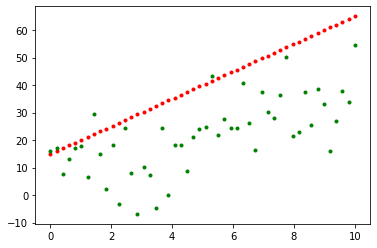

In [ ]:
m_guess = 5
b_guess = 15

y_guess = m_guess * x + b_guess

plt.plot(x,y_guess,'r.');
plt.plot(x,y,'g.');

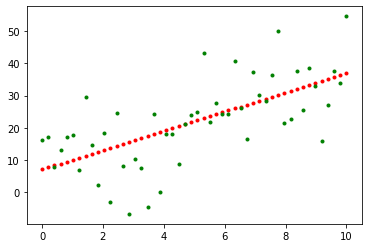

In [ ]:
m_guess = 3
b_guess = 7

y_guess = m_guess * x + b_guess

plt.plot(x,y_guess,'r.');
plt.plot(x,y,'g.');

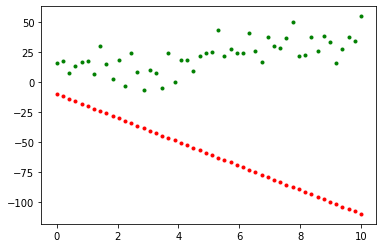

412426.31584259943 -10.0 -10.0


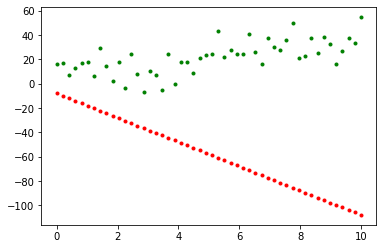

394498.0641415304 -10.0 -7.777777777777778


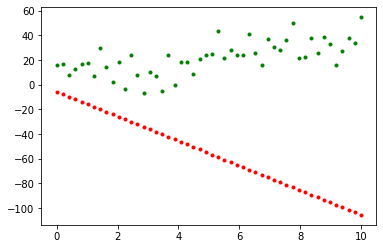

377063.63960095524 -10.0 -5.555555555555555


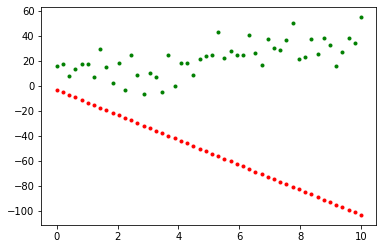

360123.0422208739 -10.0 -3.333333333333333


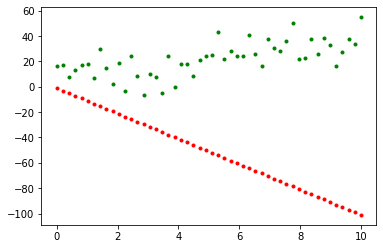

343676.2720012863 -10.0 -1.1111111111111107


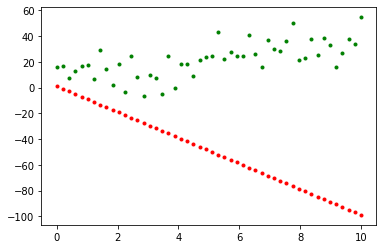

327723.32894219254 -10.0 1.1111111111111107


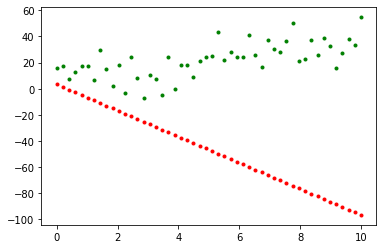

312264.2130435928 -10.0 3.333333333333334


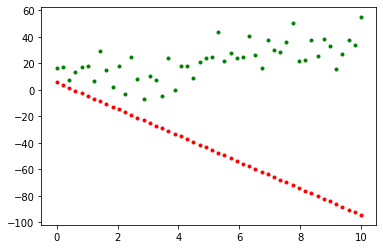

297298.9243054866 -10.0 5.555555555555557


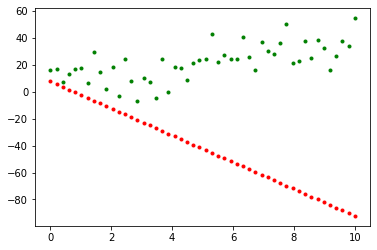

282827.46272787446 -10.0 7.777777777777779


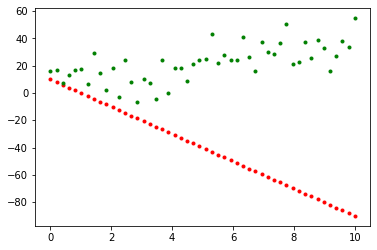

268849.828310756 -10.0 10.0


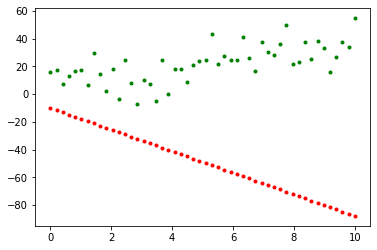

304899.20808887866 -7.777777777777778 -10.0


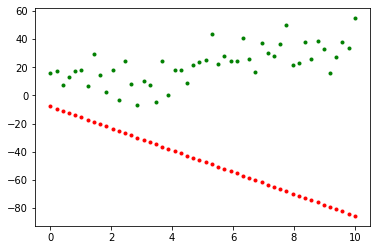

289440.09219027875 -7.777777777777778 -7.777777777777778


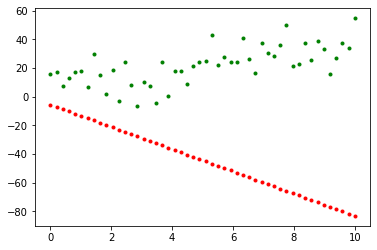

274474.8034521727 -7.777777777777778 -5.555555555555555


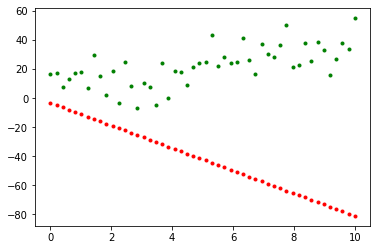

260003.34187456046 -7.777777777777778 -3.333333333333333


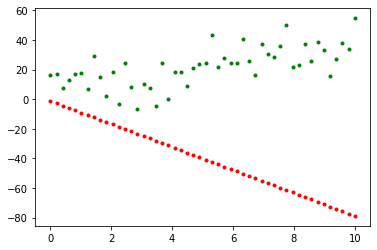

246025.70745744207 -7.777777777777778 -1.1111111111111107


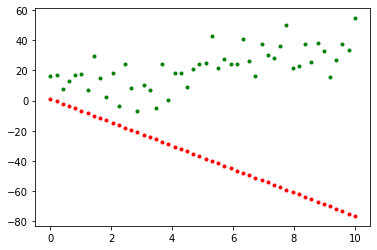

232541.9002008175 -7.777777777777778 1.1111111111111107


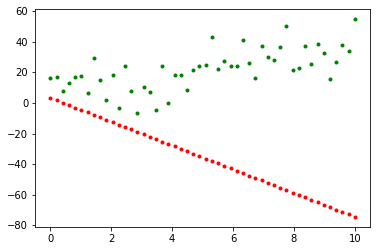

219551.92010468672 -7.777777777777778 3.333333333333334


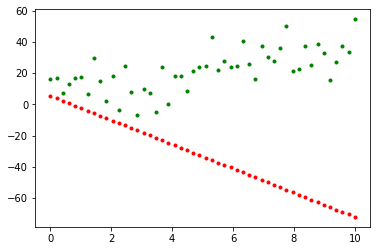

207055.76716904982 -7.777777777777778 5.555555555555557


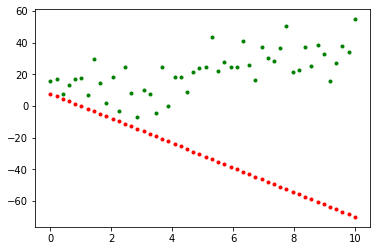

195053.44139390672 -7.777777777777778 7.777777777777779


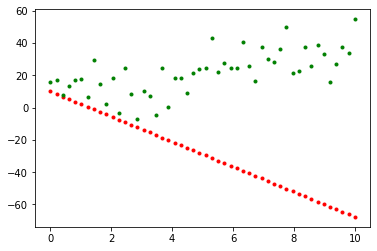

183544.94277925746 -7.777777777777778 10.0


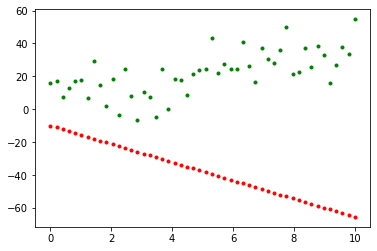

214000.97410688875 -5.555555555555555 -10.0


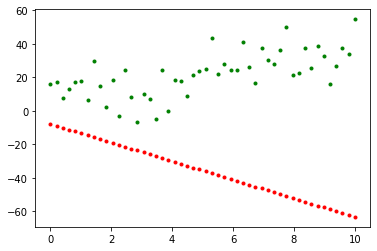

201010.994010758 -5.555555555555555 -7.777777777777778


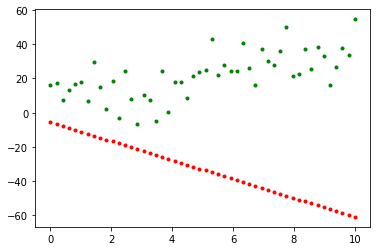

188514.8410751211 -5.555555555555555 -5.555555555555555


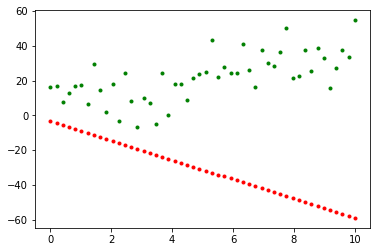

176512.51529997803 -5.555555555555555 -3.333333333333333


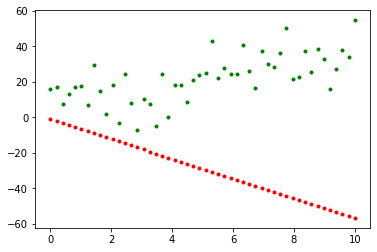

165004.0166853287 -5.555555555555555 -1.1111111111111107


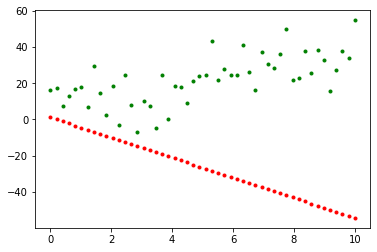

153989.3452311733 -5.555555555555555 1.1111111111111107


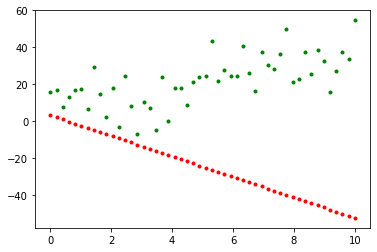

143468.50093751168 -5.555555555555555 3.333333333333334


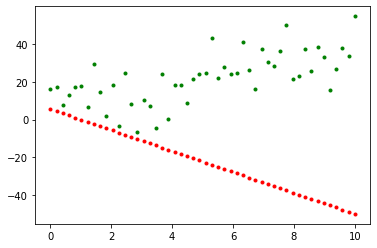

133441.48380434385 -5.555555555555555 5.555555555555557


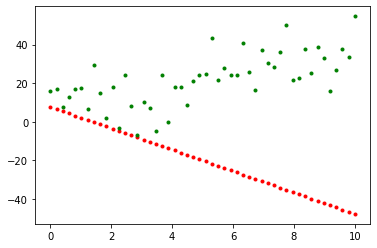

123908.2938316699 -5.555555555555555 7.777777777777779


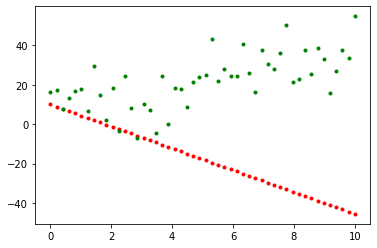

114868.93101948974 -5.555555555555555 10.0


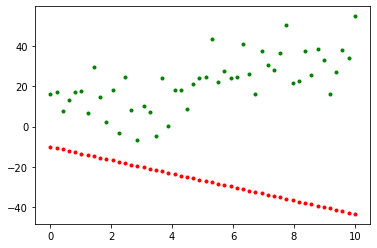

139731.6138966298 -3.333333333333333 -10.0


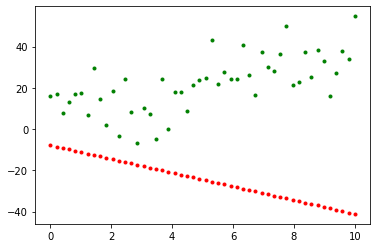

129210.7696029682 -3.333333333333333 -7.777777777777778


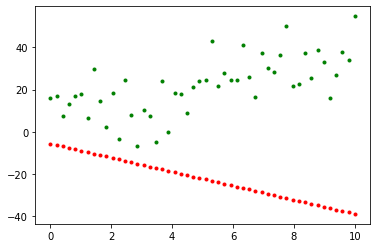

119183.7524698004 -3.333333333333333 -5.555555555555555


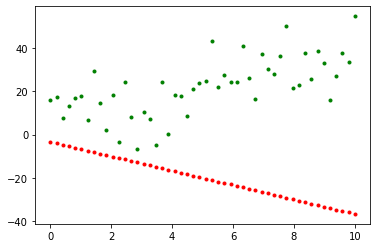

109650.56249712643 -3.333333333333333 -3.333333333333333


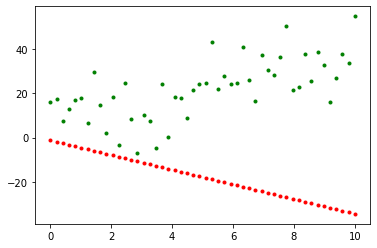

100611.19968494627 -3.333333333333333 -1.1111111111111107


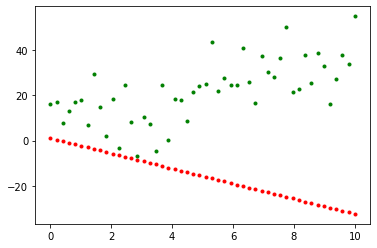

92065.66403325998 -3.333333333333333 1.1111111111111107


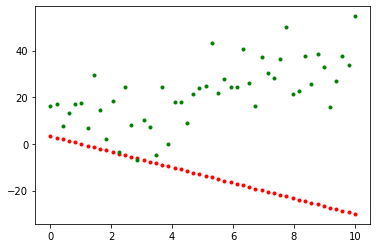

84013.9555420675 -3.333333333333333 3.333333333333334


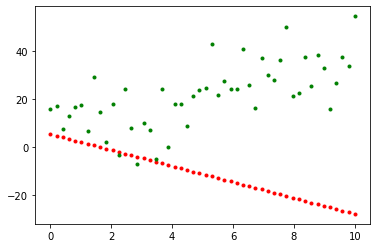

76456.07421136883 -3.333333333333333 5.555555555555557


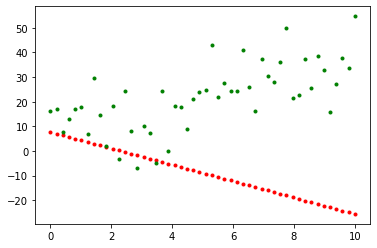

69392.02004116401 -3.333333333333333 7.777777777777779


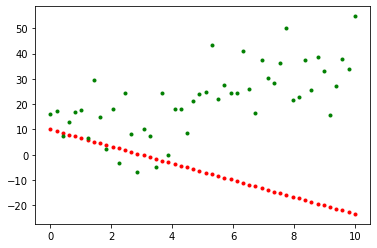

62821.79303145302 -3.333333333333333 10.0


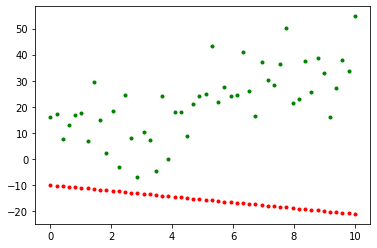

82091.12745810175 -1.1111111111111107 -10.0


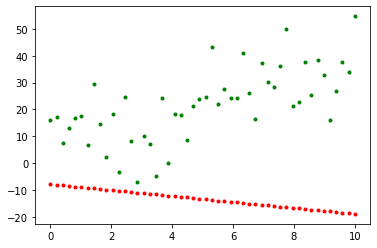

74039.41896690926 -1.1111111111111107 -7.777777777777778


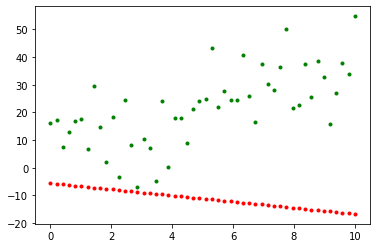

66481.5376362106 -1.1111111111111107 -5.555555555555555


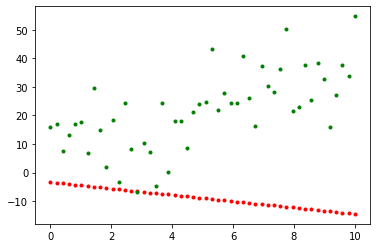

59417.483466005775 -1.1111111111111107 -3.333333333333333


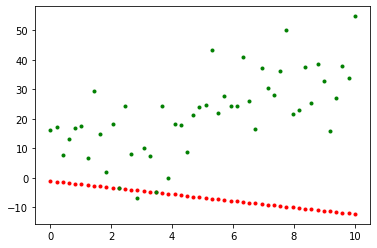

52847.25645629478 -1.1111111111111107 -1.1111111111111107


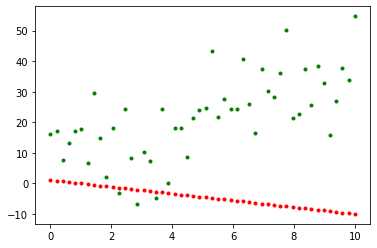

46770.8566070776 -1.1111111111111107 1.1111111111111107


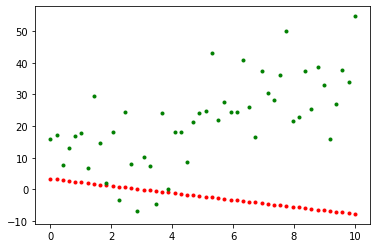

41188.28391835425 -1.1111111111111107 3.333333333333334


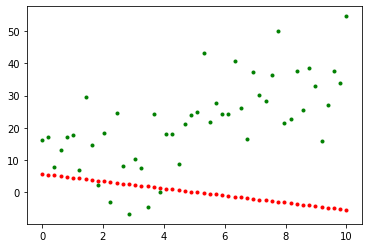

36099.53839012473 -1.1111111111111107 5.555555555555557


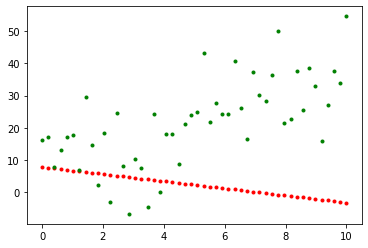

31504.620022389037 -1.1111111111111107 7.777777777777779


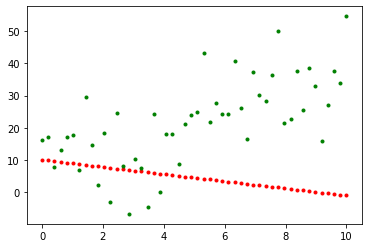

27403.528815147176 -1.1111111111111107 10.0


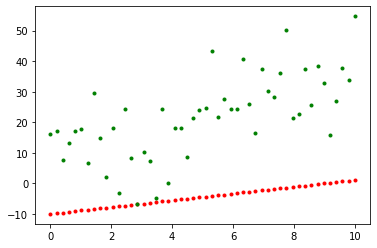

41079.51479130462 1.1111111111111107 -10.0


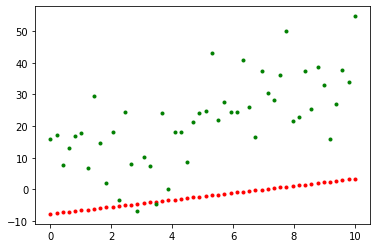

35496.94210258126 1.1111111111111107 -7.777777777777778


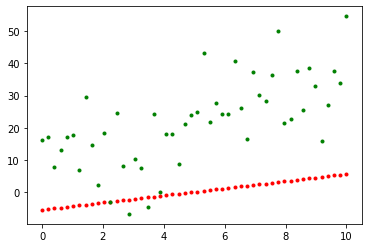

30408.196574351743 1.1111111111111107 -5.555555555555555


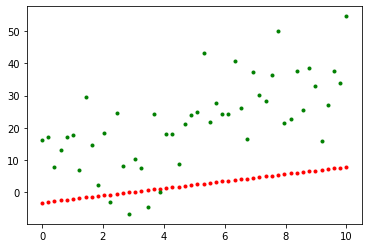

25813.27820661605 1.1111111111111107 -3.333333333333333


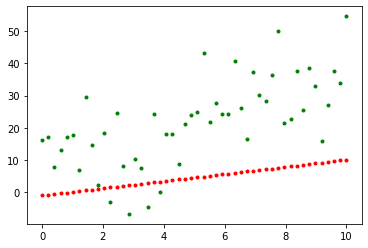

21712.186999374186 1.1111111111111107 -1.1111111111111107


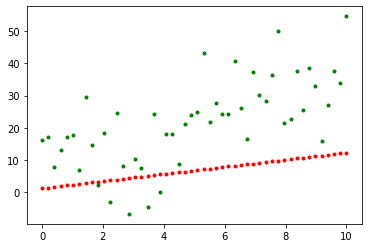

18104.922952626148 1.1111111111111107 1.1111111111111107


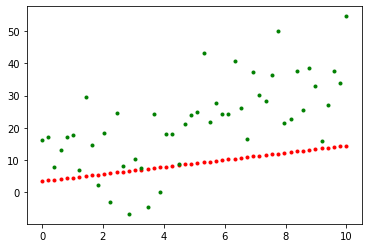

14991.486066371937 1.1111111111111107 3.333333333333334


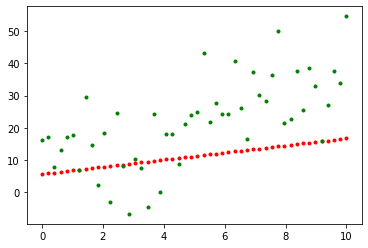

12371.876340611547 1.1111111111111107 5.555555555555557


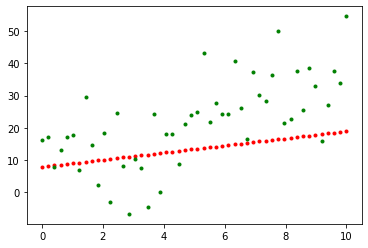

10246.093775344993 1.1111111111111107 7.777777777777779


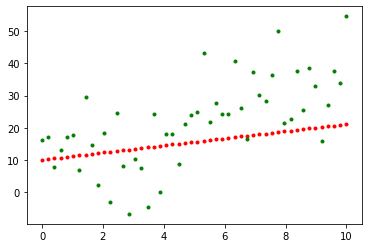

8614.138370572262 1.1111111111111107 10.0


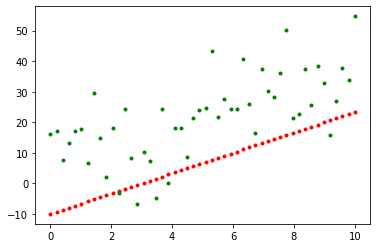

16696.775896238374 3.333333333333334 -10.0


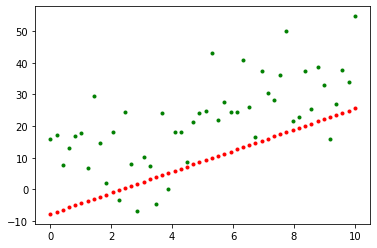

13583.339009984164 3.333333333333334 -7.777777777777778


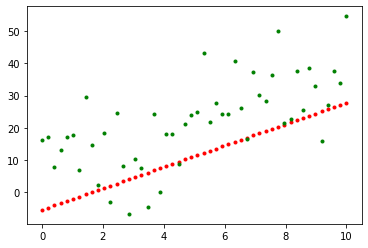

10963.72928422378 3.333333333333334 -5.555555555555555


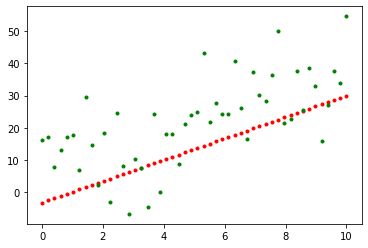

8837.946718957224 3.333333333333334 -3.333333333333333


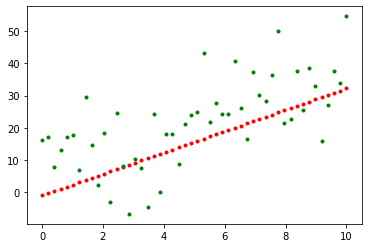

7205.9913141844945 3.333333333333334 -1.1111111111111107


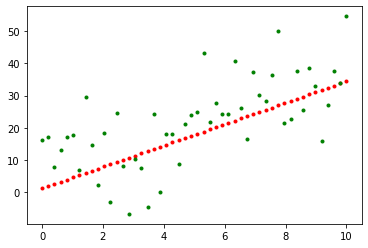

6067.863069905593 3.333333333333334 1.1111111111111107


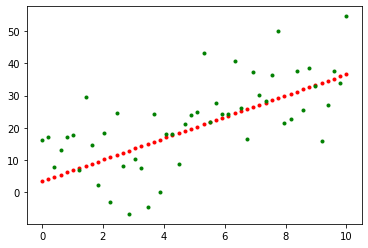

5423.561986120519 3.333333333333334 3.333333333333334


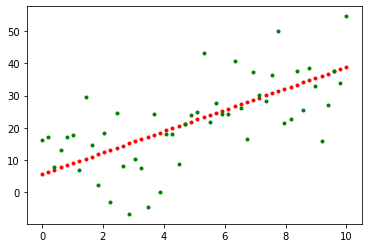

5273.088062829271 3.333333333333334 5.555555555555557


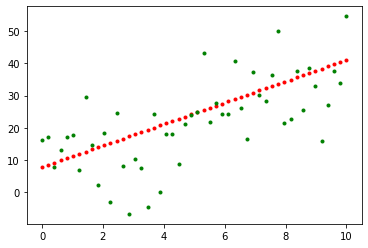

5616.441300031851 3.333333333333334 7.777777777777779


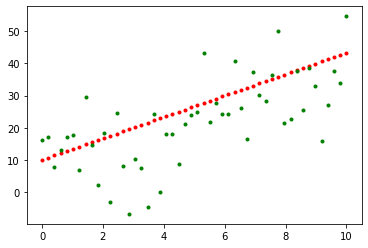

6453.621697728257 3.333333333333334 10.0


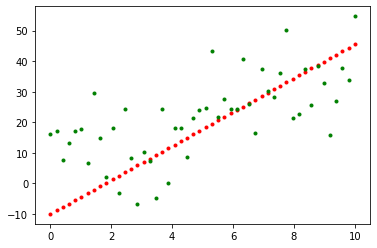

8942.910772903066 5.555555555555557 -10.0


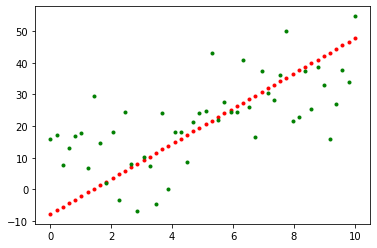

8298.609689117993 5.555555555555557 -7.777777777777778


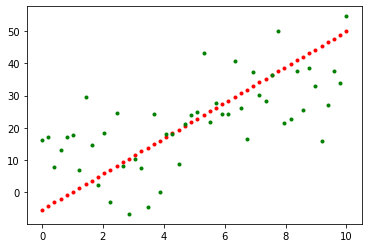

8148.135765826746 5.555555555555557 -5.555555555555555


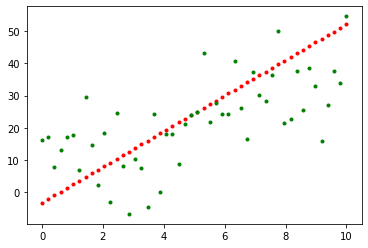

8491.489003029325 5.555555555555557 -3.333333333333333


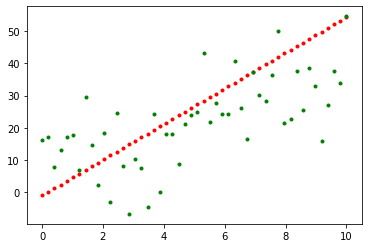

9328.669400725736 5.555555555555557 -1.1111111111111107


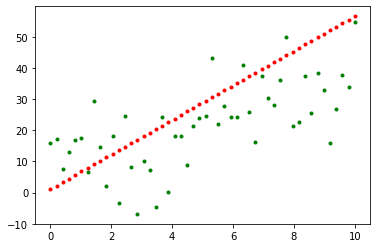

10659.67695891597 5.555555555555557 1.1111111111111107


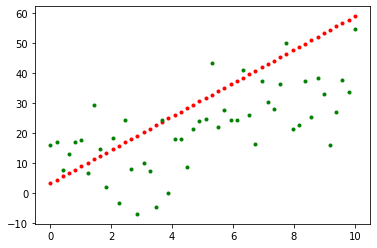

12484.511677600034 5.555555555555557 3.333333333333334


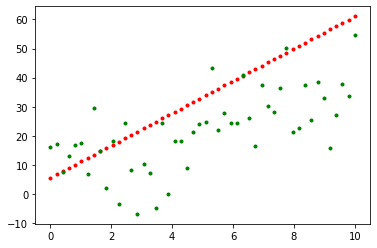

14803.173556777921 5.555555555555557 5.555555555555557


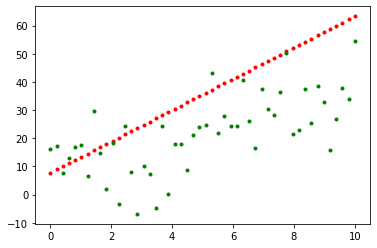

17615.662596449638 5.555555555555557 7.777777777777779


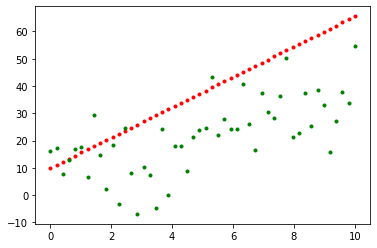

20921.97879661518 5.555555555555557 10.0


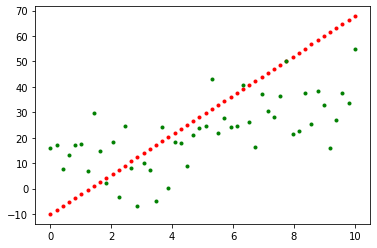

17817.919421298673 7.777777777777779 -10.0


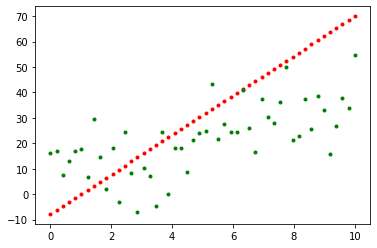

19642.75413998274 7.777777777777779 -7.777777777777778


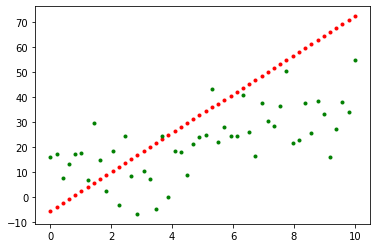

21961.416019160624 7.777777777777779 -5.555555555555555


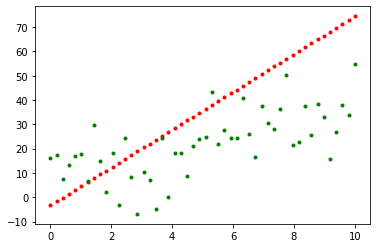

24773.90505883234 7.777777777777779 -3.333333333333333


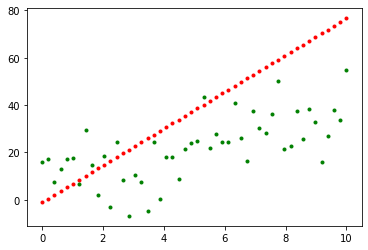

28080.22125899788 7.777777777777779 -1.1111111111111107


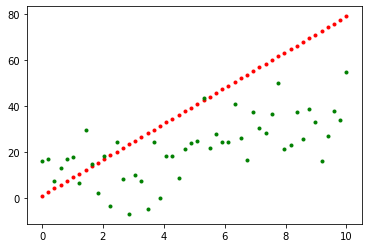

31880.364619657255 7.777777777777779 1.1111111111111107


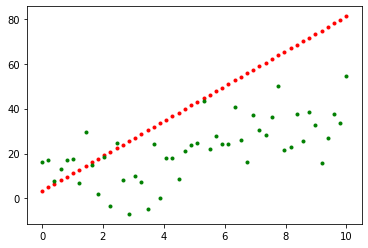

36174.33514081045 7.777777777777779 3.333333333333334


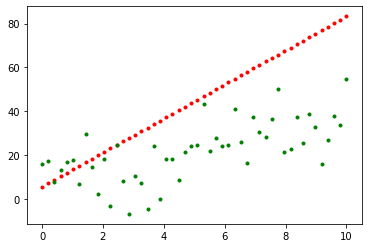

40962.132822457475 7.777777777777779 5.555555555555557


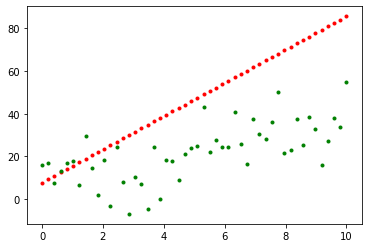

46243.75766459833 7.777777777777779 7.777777777777779


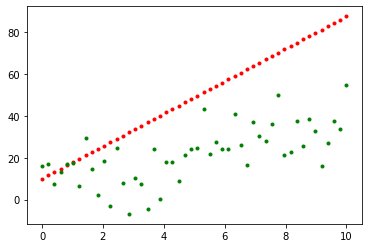

52019.20966723301 7.777777777777779 10.0


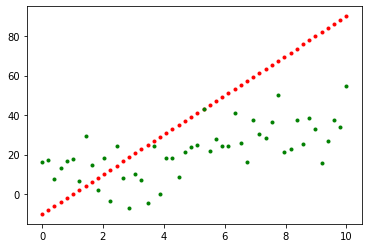

43321.801841425186 10.0 -10.0


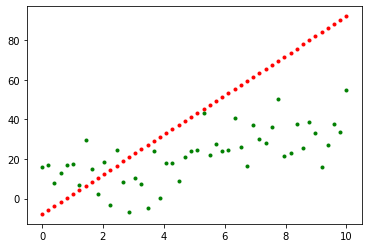

47615.77236257839 10.0 -7.777777777777778


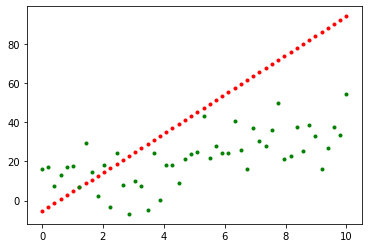

52403.57004422541 10.0 -5.555555555555555


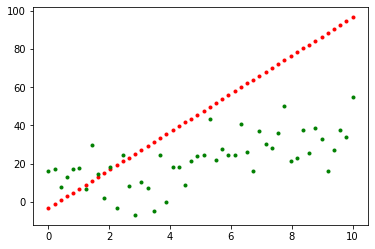

57685.19488636626 10.0 -3.333333333333333


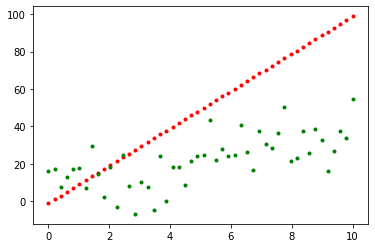

63460.646889000935 10.0 -1.1111111111111107


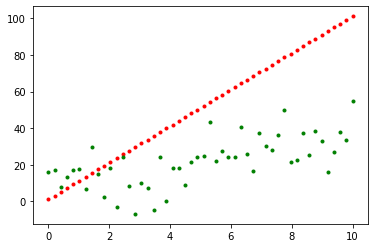

69729.92605212946 10.0 1.1111111111111107


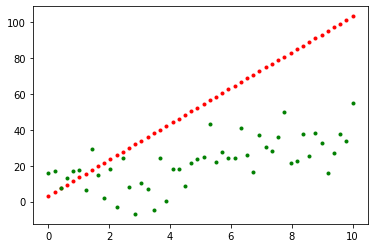

76493.03237575175 10.0 3.333333333333334


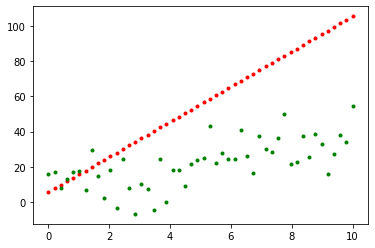

83749.96585986797 10.0 5.555555555555557


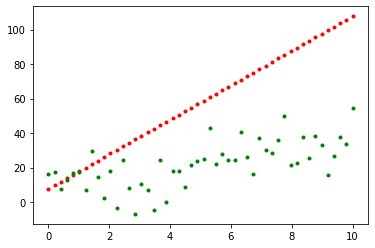

91500.72650447792 10.0 7.777777777777779


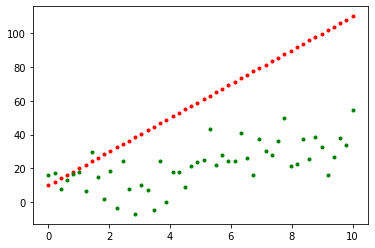

99745.31430958174 10.0 10.0


In [ ]:
for m_guess in np.linspace(-10,10,10):
    for b_guess in np.linspace(-10,10,10): #the graphs with guess's and line of best fit
        
        y_guess = m_guess * x + b_guess

        plt.plot(x,y_guess,'r.');
        plt.plot(x,y,'g.');
        plt.show()

        loss = np.sum((y_guess - y)**2)

        print(loss,m_guess,b_guess)

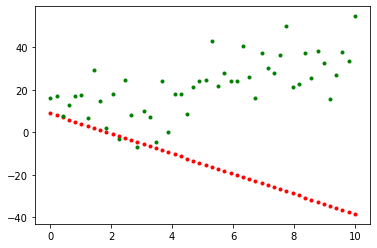

97548.35266016412 -4.736842105263158 8.94736842105263


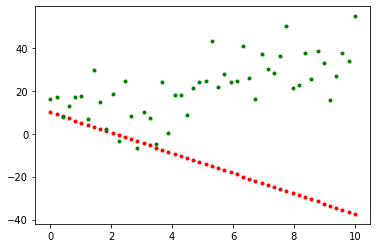

93759.00844103663 -4.736842105263158 10.0


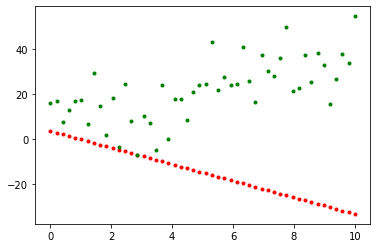

91008.25694676246 -3.6842105263157894 3.6842105263157894


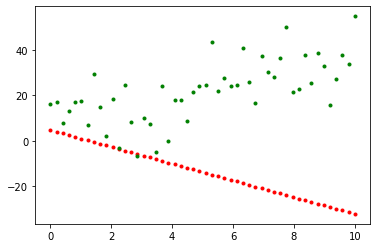

87218.91272763496 -3.6842105263157894 4.7368421052631575


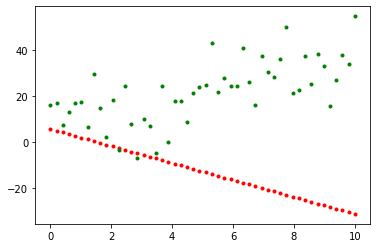

83540.3718326072 -3.6842105263157894 5.789473684210526


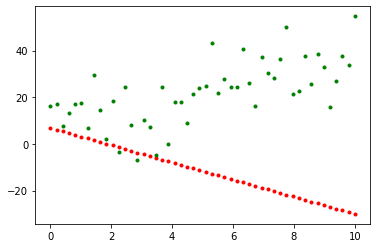

79972.63426167914 -3.6842105263157894 6.842105263157894


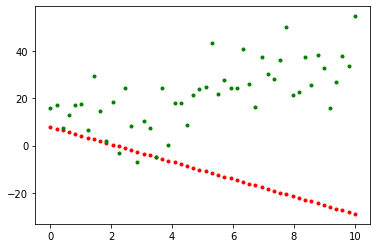

76515.70001485081 -3.6842105263157894 7.894736842105264


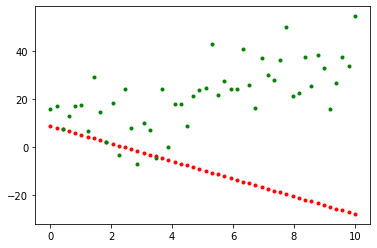

73169.56909212223 -3.6842105263157894 8.94736842105263


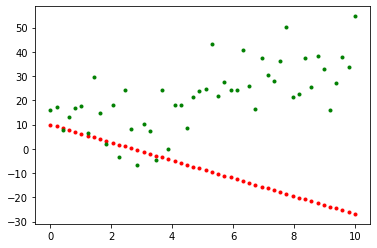

69934.24149349333 -3.6842105263157894 10.0


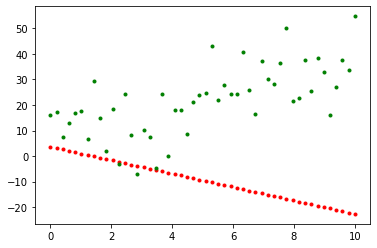

67590.522618361 -2.6315789473684212 3.6842105263157894


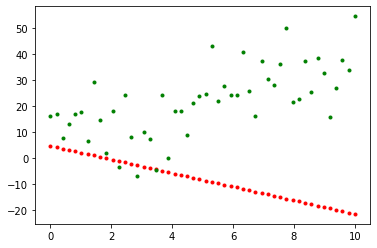

64355.19501973212 -2.6315789473684212 4.7368421052631575


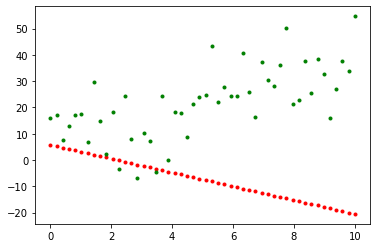

61230.67074520298 -2.6315789473684212 5.789473684210526


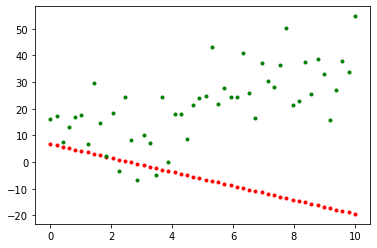

58216.949794773536 -2.6315789473684212 6.842105263157894


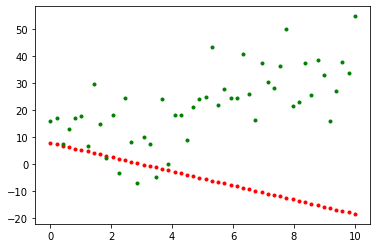

55314.032168443824 -2.6315789473684212 7.894736842105264


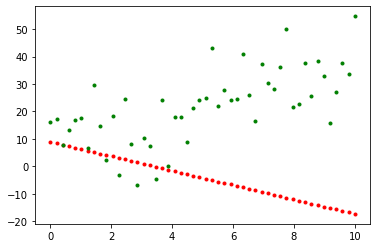

52521.917866213844 -2.6315789473684212 8.94736842105263


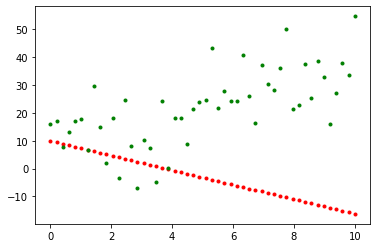

49840.606888083574 -2.6315789473684212 10.0


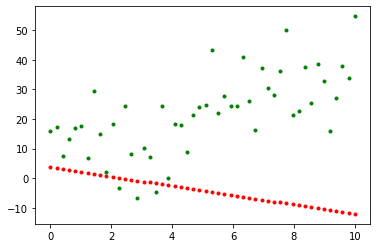

47903.9206320931 -1.578947368421053 3.6842105263157894


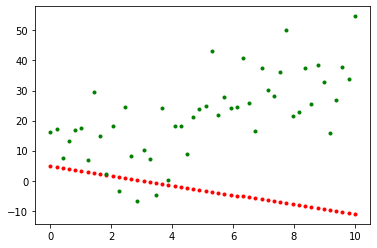

45222.60965396282 -1.578947368421053 4.7368421052631575


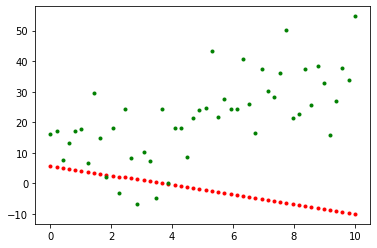

42652.10199993229 -1.578947368421053 5.789473684210526


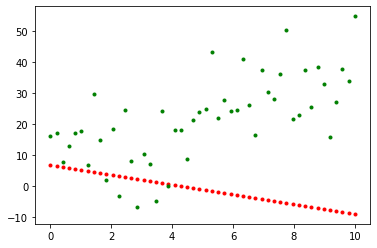

40192.39767000147 -1.578947368421053 6.842105263157894


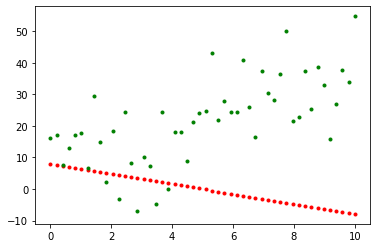

37843.49666417037 -1.578947368421053 7.894736842105264


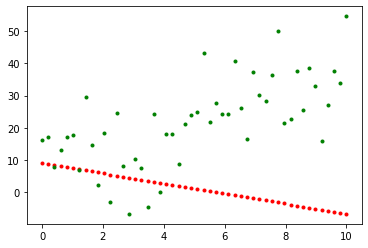

35605.398982439 -1.578947368421053 8.94736842105263


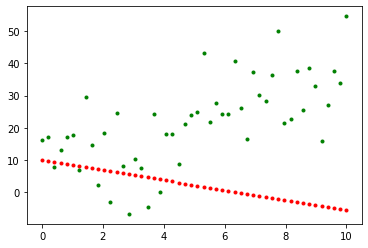

33478.10462480735 -1.578947368421053 10.0


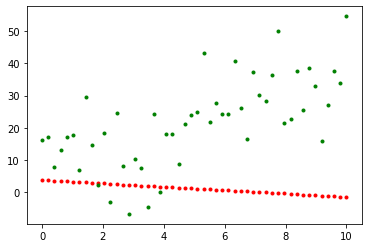

31948.450987958702 -0.526315789473685 3.6842105263157894


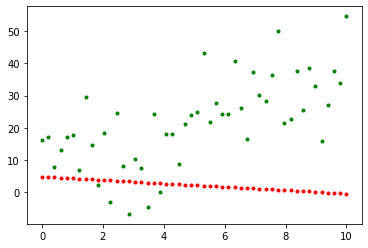

29821.156630327052 -0.526315789473685 4.7368421052631575


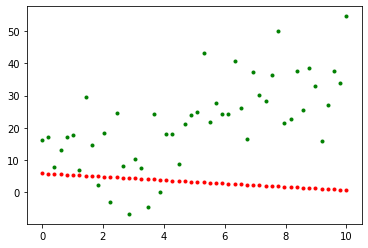

27804.665596795123 -0.526315789473685 5.789473684210526


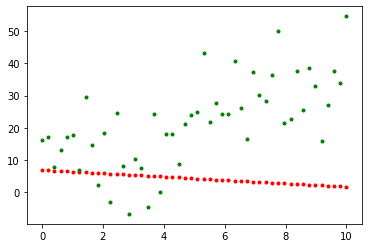

25898.977887362922 -0.526315789473685 6.842105263157894


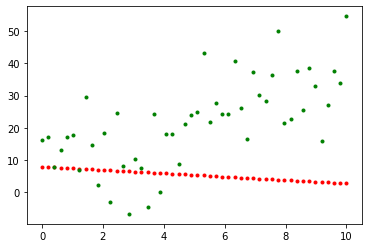

24104.093502030435 -0.526315789473685 7.894736842105264


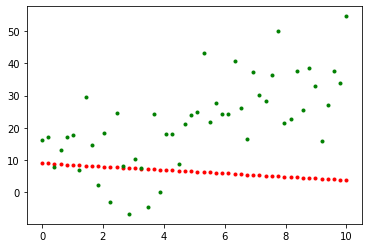

22420.012440797676 -0.526315789473685 8.94736842105263


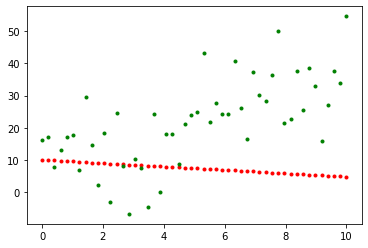

20846.734703664642 -0.526315789473685 10.0


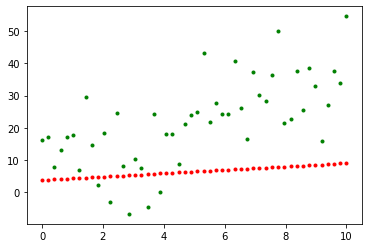

19724.113685957836 0.5263157894736832 3.6842105263157894


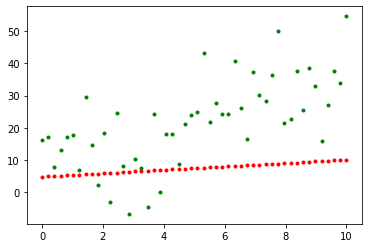

18150.835948824802 0.5263157894736832 4.7368421052631575


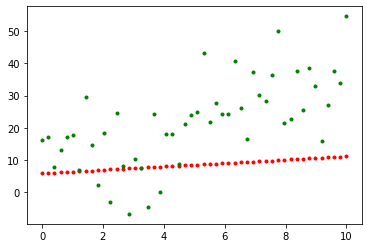

16688.36153579149 0.5263157894736832 5.789473684210526


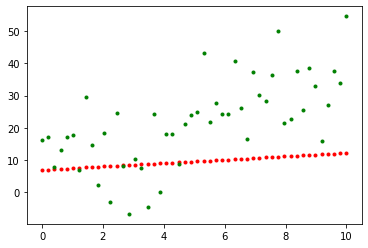

15336.690446857903 0.5263157894736832 6.842105263157894


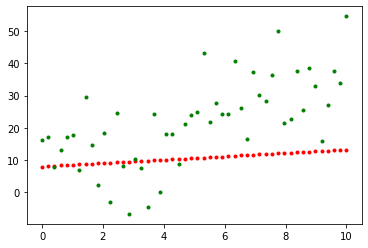

14095.82268202403 0.5263157894736832 7.894736842105264


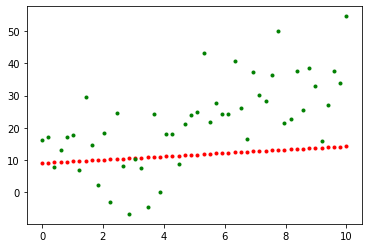

12965.75824128989 0.5263157894736832 8.94736842105263


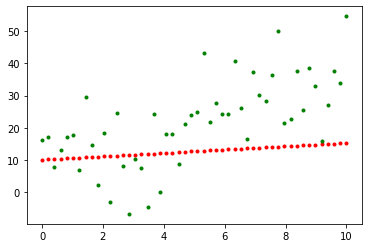

11946.497124655467 0.5263157894736832 10.0


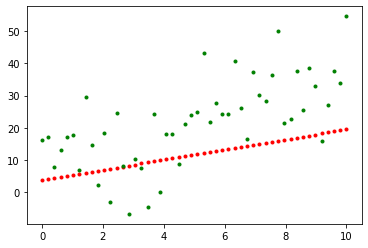

11230.908726090502 1.5789473684210513 3.6842105263157894


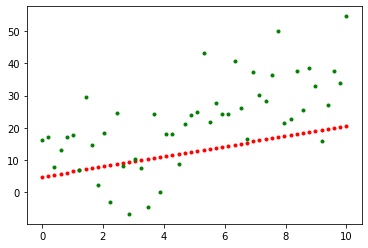

10211.647609456082 1.5789473684210513 4.7368421052631575


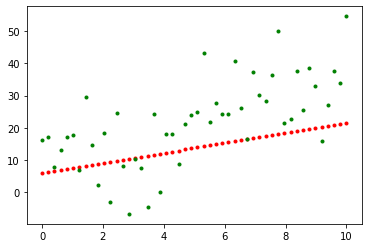

9303.189816921385 1.5789473684210513 5.789473684210526


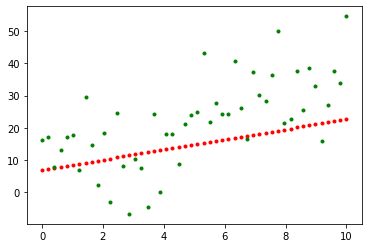

8505.53534848641 1.5789473684210513 6.842105263157894


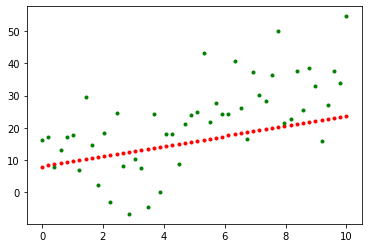

7818.684204151156 1.5789473684210513 7.894736842105264


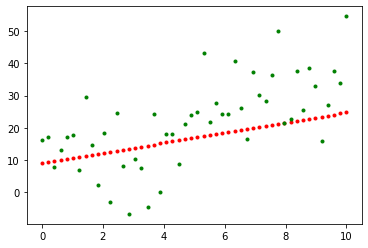

7242.636383915628 1.5789473684210513 8.94736842105263


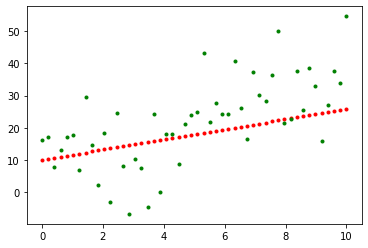

6777.3918877798205 1.5789473684210513 10.0


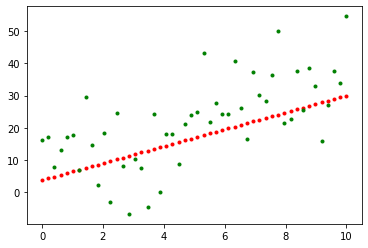

6468.83610835669 2.6315789473684212 3.6842105263157894


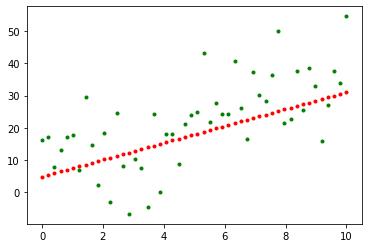

6003.591612220885 2.6315789473684212 4.7368421052631575


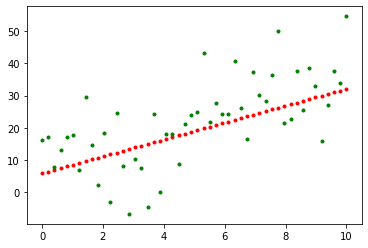

5649.150440184803 2.6315789473684212 5.789473684210526


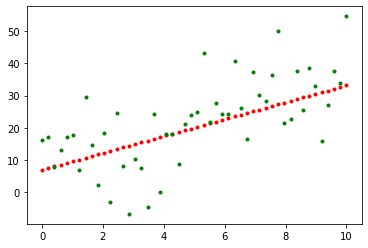

5405.512592248444 2.6315789473684212 6.842105263157894


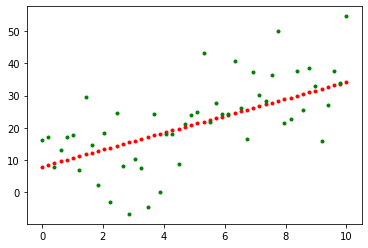

5272.6780684118075 2.6315789473684212 7.894736842105264


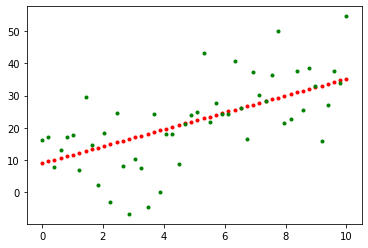

5250.646868674894 2.6315789473684212 8.94736842105263


In [ ]:
best_loss = 100000 #line of best fit plot
best_m = 0
best_b = 0 

for m_guess in np.linspace(-10,10,20):
    for b_guess in np.linspace(-10,10,20):
        
        y_guess = m_guess * x + b_guess

        loss = np.sum((y_guess - y)**2)

        if loss < best_loss:
            
            best_loss = loss
            best_m = m_guess
            best_b = b_guess 

            plt.plot(x,y_guess,'r.');
            plt.plot(x,y,'g.');
            plt.show()

            print(loss,m_guess,b_guess)